# Loan Dataset

### Data Description:

        Problem Stetment: Build a predictive model to predict Interest Rate

        Target Variable --> Interest_Rate.

In [1]:
## importing libraries as we needed.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split

In [2]:
# Reading the Loan data file
df = pd.read_csv("loan_data_train.csv")
df

,ID,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
0,79542.0,25000,25000,18.49%,60 months,debt_consolidation,27.56%,VA,MORTGAGE,8606.56,720-724,11,15210,3.0,5 years
1,75473.0,19750,19750,17.27%,60 months,debt_consolidation,13.39%,NY,MORTGAGE,6737.50,710-714,14,19070,3.0,4 years
2,67265.0,2100,2100,14.33%,36 months,major_purchase,3.50%,LA,OWN,1000.00,690-694,13,893,1.0,< 1 year
3,80167.0,28000,28000,16.29%,36 months,credit_card,19.62%,NV,MORTGAGE,7083.33,710-714,12,38194,1.0,10+ years
4,17240.0,24250,17431.82,12.23%,60 months,credit_card,23.79%,OH,MORTGAGE,5833.33,730-734,6,31061,2.0,10+ years
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,74047.0,30000,30000,23.28%,60 months,other,12.10%,IL,MORTGAGE,7083.33,675-679,16,17969,1.0,10+ years
2196,63768.0,4200,4200,14.33%,60 months,car,14.16%,NJ,RENT,3850.00,700-704,4,5718,0.0,2 years
2197,94545.0,19800,19775,15.31%,60 months,debt_consolidation,15.03%,IL,MORTGAGE,6666.67,675-679,10,46879,3.0,6 years
2198,53635.0,18000,18000,20.99%,60 months,credit_card,11.63%,CA,RENT,9051.83,670-674,5,32394,2.0,4 years


## EDA

In [3]:
#head() shows first 5 records
df

,ID,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
0,79542.0,25000,25000,18.49%,60 months,debt_consolidation,27.56%,VA,MORTGAGE,8606.56,720-724,11,15210,3.0,5 years
1,75473.0,19750,19750,17.27%,60 months,debt_consolidation,13.39%,NY,MORTGAGE,6737.50,710-714,14,19070,3.0,4 years
2,67265.0,2100,2100,14.33%,36 months,major_purchase,3.50%,LA,OWN,1000.00,690-694,13,893,1.0,< 1 year
3,80167.0,28000,28000,16.29%,36 months,credit_card,19.62%,NV,MORTGAGE,7083.33,710-714,12,38194,1.0,10+ years
4,17240.0,24250,17431.82,12.23%,60 months,credit_card,23.79%,OH,MORTGAGE,5833.33,730-734,6,31061,2.0,10+ years
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,74047.0,30000,30000,23.28%,60 months,other,12.10%,IL,MORTGAGE,7083.33,675-679,16,17969,1.0,10+ years
2196,63768.0,4200,4200,14.33%,60 months,car,14.16%,NJ,RENT,3850.00,700-704,4,5718,0.0,2 years
2197,94545.0,19800,19775,15.31%,60 months,debt_consolidation,15.03%,IL,MORTGAGE,6666.67,675-679,10,46879,3.0,6 years
2198,53635.0,18000,18000,20.99%,60 months,credit_card,11.63%,CA,RENT,9051.83,670-674,5,32394,2.0,4 years


In [4]:
# Changing the column names
df.columns = [i.replace(".","_") for i in df.columns]
df.columns

Index(['ID', 'Amount_Requested', 'Amount_Funded_By_Investors', 'Interest_Rate',
       'Loan_Length', 'Loan_Purpose', 'Debt_To_Income_Ratio', 'State',
       'Home_Ownership', 'Monthly_Income', 'FICO_Range', 'Open_CREDIT_Lines',
       'Revolving_CREDIT_Balance', 'Inquiries_in_the_Last_6_Months',
       'Employment_Length'],
      dtype='object')

In [5]:
# converting object to numeric

#Lambda Function: 
#          lambda is onetime,runtime,singletime expreesion anonymous function
#       --Lambda functions are anonymous
#        --They do not have any name
#        --‘Lambda’ keyword to be used to create lambda function
#        --Simple one-line function
#       --No ‘def’ or ‘return’ keyword to be used with a lambda function

#The applymap function is used here to apply the specified function (pd.to_numeric) element-wise to the entire DataFrame.
#The pd.to_numeric function is used to convert the values to numeric type. 
#The errors='coerce' parameter is set to coerce errors, meaning that if there are any values that cannot be converted to numeric, they will be replaced with NaN (Not a Number).

to_num_list = ['Amount_Requested', 'Amount_Funded_By_Investors', 'Open_CREDIT_Lines', 'Revolving_CREDIT_Balance']
df[to_num_list] = df[to_num_list].applymap(lambda x:pd.to_numeric(x,errors='coerce'))
df[to_num_list] 

,Amount_Requested,Amount_Funded_By_Investors,Open_CREDIT_Lines,Revolving_CREDIT_Balance
0,25000.0,25000.00,11.0,15210.0
1,19750.0,19750.00,14.0,19070.0
2,2100.0,2100.00,13.0,893.0
3,28000.0,28000.00,12.0,38194.0
4,24250.0,17431.82,6.0,31061.0
...,...,...,...,...
2195,30000.0,30000.00,16.0,17969.0
2196,4200.0,4200.00,4.0,5718.0
2197,19800.0,19775.00,10.0,46879.0
2198,18000.0,18000.00,5.0,32394.0


In [7]:
# removing % from 'Interest_Rate' &  'Debt_To_Income_Ratio'
#lambda x: x.str.replace('%', ''): This lambda function is used to remove the '%' character from each element 

#.str.replace('%', '')           : method is a string method in pandas that replaces occurrences of '%' with an empty string.
#                                  in the selected columns.
df[['Interest_Rate', 'Debt_To_Income_Ratio']] = df[['Interest_Rate', 'Debt_To_Income_Ratio']].apply((lambda x:x.str.replace('%','')), axis = 1)

In [8]:
# converting 'Interest_Rate' &  'Debt_To_Income_Ratio' to numeric
# astype(float): This part of the code is used to change the data type of the selected columns to float
df[['Interest_Rate', 'Debt_To_Income_Ratio']] = df[['Interest_Rate', 'Debt_To_Income_Ratio']].astype(float)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              2199 non-null   float64
 1   Amount_Requested                2195 non-null   float64
 2   Amount_Funded_By_Investors      2196 non-null   float64
 3   Interest_Rate                   2200 non-null   float64
 4   Loan_Length                     2199 non-null   object 
 5   Loan_Purpose                    2199 non-null   object 
 6   Debt_To_Income_Ratio            2199 non-null   float64
 7   State                           2199 non-null   object 
 8   Home_Ownership                  2199 non-null   object 
 9   Monthly_Income                  2197 non-null   float64
 10  FICO_Range                      2200 non-null   object 
 11  Open_CREDIT_Lines               2193 non-null   float64
 12  Revolving_CREDIT_Balance        21

In [11]:
df.isnull().sum()

ID                                 1
Amount_Requested                   5
Amount_Funded_By_Investors         4
Interest_Rate                      0
Loan_Length                        1
Loan_Purpose                       1
Debt_To_Income_Ratio               1
State                              1
Home_Ownership                     1
Monthly_Income                     3
FICO_Range                         0
Open_CREDIT_Lines                  7
Revolving_CREDIT_Balance           5
Inquiries_in_the_Last_6_Months     3
Employment_Length                 69
dtype: int64

In [12]:
# removing 1 record where ID is not given and moving ID column to index as it has no use for model building
df = df.drop('ID', axis = 1)

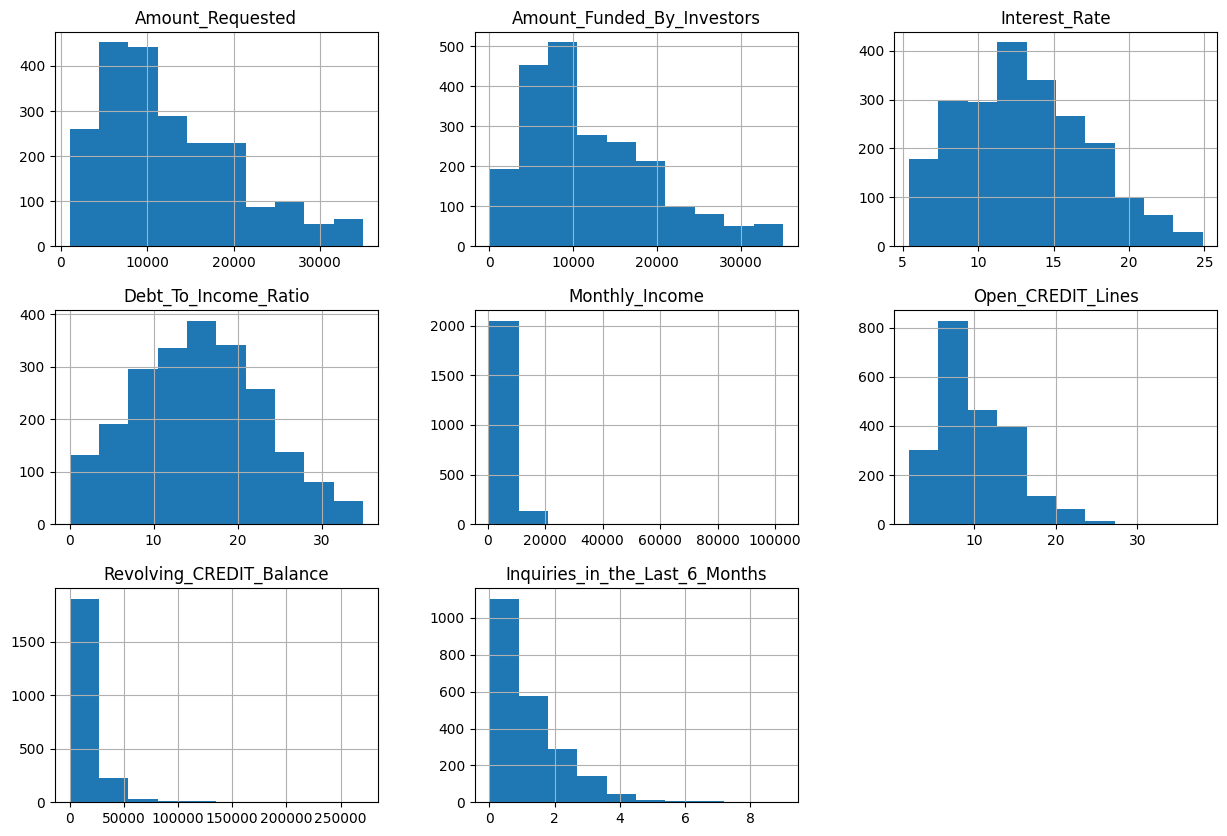

In [13]:
# visualizing numeric columns
df.hist(figsize = (15,10));
# most of numeric cols are right skewed except Interest_Rate and Debt_To_Income_Ratio are fairly normally distributed

# Handling Nulls

In [14]:
# checking nulls
# isnull() function is used to display null value.
df.isnull().sum()

Amount_Requested                   5
Amount_Funded_By_Investors         4
Interest_Rate                      0
Loan_Length                        1
Loan_Purpose                       1
Debt_To_Income_Ratio               1
State                              1
Home_Ownership                     1
Monthly_Income                     3
FICO_Range                         0
Open_CREDIT_Lines                  7
Revolving_CREDIT_Balance           5
Inquiries_in_the_Last_6_Months     3
Employment_Length                 69
dtype: int64

In [15]:
# filling the null values with either median for numeric columns or mode for categorical columns
#if null values in object then fill with mode
#otherwise modian
for col in df.isnull().sum().index:
    if col in df.select_dtypes(include = 'object').columns:
        df[col].fillna(df[col].mode()[0], inplace = True)
    else:
        df[col].fillna(df[col].median(), inplace = True)

In [16]:
df.describe()

,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Debt_To_Income_Ratio,Monthly_Income,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,12490.795455,12074.025582,13.051218,15.371036,5726.467300,10.078182,15325.746818,0.897273
std,7848.946790,7768.761561,4.173349,7.518771,4070.838644,4.491240,18700.642197,1.218842
min,1000.000000,-0.010000,5.420000,0.000000,588.500000,2.000000,0.000000,0.000000
25%,6000.000000,6000.000000,10.160000,9.737500,3458.000000,7.000000,5612.250000,0.000000
50%,10000.000000,10000.000000,13.110000,15.220000,5000.000000,9.000000,11011.000000,0.000000
75%,17000.000000,16200.000000,15.800000,20.672500,6877.082500,13.000000,18825.500000,1.000000
max,35000.000000,35000.000000,24.890000,34.910000,102750.000000,38.000000,270800.000000,9.000000


In [17]:
df.isnull().sum()

Amount_Requested                  0
Amount_Funded_By_Investors        0
Interest_Rate                     0
Loan_Length                       0
Loan_Purpose                      0
Debt_To_Income_Ratio              0
State                             0
Home_Ownership                    0
Monthly_Income                    0
FICO_Range                        0
Open_CREDIT_Lines                 0
Revolving_CREDIT_Balance          0
Inquiries_in_the_Last_6_Months    0
Employment_Length                 0
dtype: int64

# Label Encoding

In [ ]:
# Label encoding is a technique in machine learning and data preprocessing where categorical data is converted into
# numerical format. In label encoding, each unique category in a categorical variable is assigned a unique integer label. 
# This helps in converting categorical data into a format that can be fed into machine learning algorithms, which often require numerical input. in short

# #Step in Encoding:
# 1)Identify Categorical Columns
# 2)Assign Integer Labels
# 3)Replace Categorical Values with Labels


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Amount_Requested                2200 non-null   float64
 1   Amount_Funded_By_Investors      2200 non-null   float64
 2   Interest_Rate                   2200 non-null   float64
 3   Loan_Length                     2200 non-null   object 
 4   Loan_Purpose                    2200 non-null   object 
 5   Debt_To_Income_Ratio            2200 non-null   float64
 6   State                           2200 non-null   object 
 7   Home_Ownership                  2200 non-null   object 
 8   Monthly_Income                  2200 non-null   float64
 9   FICO_Range                      2200 non-null   object 
 10  Open_CREDIT_Lines               2200 non-null   float64
 11  Revolving_CREDIT_Balance        2200 non-null   float64
 12  Inquiries_in_the_Last_6_Months  22

In [19]:
cat_col_list = [col for col in df.columns if df[col].dtypes == 'object']
cat_col_list 

['Loan_Length',
 'Loan_Purpose',
 'State',
 'Home_Ownership',
 'FICO_Range',
 'Employment_Length']

In [20]:
df.Loan_Length.value_counts()

Loan_Length
36 months    1723
60 months     476
.               1
Name: count, dtype: int64

In [21]:
# some categorical columns has '.' so filling the '.' with mode
for col in cat_col_list:
    df[col].replace({".":df[col].mode()[0]}, inplace = True)

In [ ]:
for col in cat_col_list:
    print(f"{col}-->{list(df[col].unique())}")
    print("-"*30)

In [22]:
# Manually Encodinng Employment_Length column
df['Employment_Length'].replace({'5 years':5, '4 years':4, '< 1 year':0, '10+ years':10, '2 years':2,
                                 '8 years':8, '1 year':1, '6 years':6, '7 years':7, '3 years':3, '9 years':9}, inplace=True)

In [23]:
df

,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,State,Home_Ownership,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length
0,25000.0,25000.00,18.49,60 months,debt_consolidation,27.56,VA,MORTGAGE,8606.56,720-724,11.0,15210.0,3.0,5
1,19750.0,19750.00,17.27,60 months,debt_consolidation,13.39,NY,MORTGAGE,6737.50,710-714,14.0,19070.0,3.0,4
2,2100.0,2100.00,14.33,36 months,major_purchase,3.50,LA,OWN,1000.00,690-694,13.0,893.0,1.0,0
3,28000.0,28000.00,16.29,36 months,credit_card,19.62,NV,MORTGAGE,7083.33,710-714,12.0,38194.0,1.0,10
4,24250.0,17431.82,12.23,60 months,credit_card,23.79,OH,MORTGAGE,5833.33,730-734,6.0,31061.0,2.0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,30000.0,30000.00,23.28,60 months,other,12.10,IL,MORTGAGE,7083.33,675-679,16.0,17969.0,1.0,10
2196,4200.0,4200.00,14.33,60 months,car,14.16,NJ,RENT,3850.00,700-704,4.0,5718.0,0.0,2
2197,19800.0,19775.00,15.31,60 months,debt_consolidation,15.03,IL,MORTGAGE,6666.67,675-679,10.0,46879.0,3.0,6
2198,18000.0,18000.00,20.99,60 months,credit_card,11.63,CA,RENT,9051.83,670-674,5.0,32394.0,2.0,4


In [24]:
objects = []
for cols in df:
    if df[cols].dtypes == 'object':
        objects.append(cols)
        
print(objects)

['Loan_Length', 'Loan_Purpose', 'State', 'Home_Ownership', 'FICO_Range']


In [25]:
df1 = df.copy()

In [26]:
# Encoding all other columns using LabelEncoder
# LabelEncoder is instantiated as label_encoder.

# The fit_transform method is used to fit the label encoder to the unique categories in the 'Category_Column' and 
# transform the original categorical values into integer labels.

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1[df1.select_dtypes(include='object').columns] = df1[df1.select_dtypes(include='object').columns].apply(le.fit_transform)

In [27]:
df1

,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,State,Home_Ownership,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length
0,25000.0,25000.00,18.49,1,2,27.56,39,0,8606.56,16,11.0,15210.0,3.0,5
1,19750.0,19750.00,17.27,1,2,13.39,29,0,6737.50,14,14.0,19070.0,3.0,4
2,2100.0,2100.00,14.33,0,6,3.50,16,3,1000.00,10,13.0,893.0,1.0,0
3,28000.0,28000.00,16.29,0,1,19.62,28,0,7083.33,14,12.0,38194.0,1.0,10
4,24250.0,17431.82,12.23,1,1,23.79,30,0,5833.33,18,6.0,31061.0,2.0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,30000.0,30000.00,23.28,1,9,12.10,12,0,7083.33,7,16.0,17969.0,1.0,10
2196,4200.0,4200.00,14.33,1,0,14.16,26,4,3850.00,12,4.0,5718.0,0.0,2
2197,19800.0,19775.00,15.31,1,2,15.03,12,0,6666.67,7,10.0,46879.0,3.0,6
2198,18000.0,18000.00,20.99,1,1,11.63,4,4,9051.83,6,5.0,32394.0,2.0,4


In [ ]:
df.drop(["State", "Amount_Funded_By_Investors"], axis=1, inplace=True)

In [ ]:
df.info()


In [ ]:
# Correlation is a statistical measure that describes the extent to which two variables change together.
# 1 indicates a perfect positive correlation: as one variable increases, the other variable also increases proportionally.
# -1 indicates a perfect negative correlation: as one variable increases, the other variable decreases proportionally.
# 0 indicates no linear correlation: the variables do not have a linear relationship.
corelation_matrix = df.corr()

In [ ]:
plt.figure(figsize = (12,8))
sns.heatmap(corelation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.1);



In [ ]:
corelation_matrix['Interest_Rate'].sort_values(ascending = False)[1:]
# Interest_Rate has high correlation with Loan_Length,Amount_Funded_By_Investors,Amount_Requested among all X variables

In [ ]:
#splitting your DataFrame df into feature variables (X) and the target variable (y)
X = df.drop('Interest_Rate', axis = 1)
y = df['Interest_Rate']

# Random Sampling


In [ ]:
# Split the data into training and testing sets:

# X: This is assumed to be your feature variables (independent variables).
# y: This is assumed to be your target variable (dependent variable).
# test_size=0.2: This parameter specifies the proportion of the dataset to include in the test split. 
#                In this case, 20% of the data will be used for testing, and the remaining 80% for training.
        
# random_state=42: This parameter sets a seed for the random number generator, ensuring reproducibility. 
#                  If you use the same random state, you'll get the same train-test split each time you run the code.

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [ ]:
print("x_train -->",x_train.shape)
print("y_train -->",y_train.shape)
print("-"*127)
print("x_test -->",x_test.shape)
print("y_test -->",y_test.shape)

In [ ]:
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()


In [ ]:

#eval_df: An empty DataFrame that will be used to store the evaluation metrics.
eval_df = pd.DataFrame()


# A function that takes a machine learning model (model) and an optional comment (comm) as input.
def check_model(model , comm = 'Basic'):
    """
    input object created for model.
    This function will calculate evaluation matrics
    and store them in eval_df (given as output)
    """
    from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
    
    #global: Declares that these variables (r_sqr, pred_train, pred_test, eval_df) are global and not local to the function.
    global r_sqr, pred_train, pred_test, eval_df
    
    #model
    #model.fit(): Trains the machine learning model with training data.
    #model_name: Converts the model object to a string representation.
    model.fit(x_train, y_train)
    model_name = str(model)
    
    #model.predict(): Generates predictions on the training and testing datasets.
    pred_train = model.predict(x_train)
    pred_test =  model.predict(x_test)
    
    # metrics
    #model.score(): Computes the coefficient of determination (R-squared) of the prediction.
    r_sqr = model.score(x_train, y_train)
    
    #Calculates the adjusted R-squared.
    n = x_train.shape[0]
    k = x_train.shape[1]
    Adj_r = 1 - (1-r_sqr)*(n-1)/(n-k-1)

   #     Calculates mean squared error (MSE), root mean squared error (RMSE), and mean absolute percentage error (MAPE) for 
   #     the training set.
    mse_train = mean_squared_error(y_train, pred_train)
    rmse_train = np.sqrt(mse_train)
    mape_train = mean_absolute_percentage_error(y_train, pred_train)
    
    #Calculates MSE, RMSE, and MAPE for the testing set.
    mse_test = mean_squared_error(y_test, pred_test)
    rmse_test = np.sqrt(mse_test)
    mape_test = mean_absolute_percentage_error(y_test, pred_test)
    
    # Evaluation data
    #Creates a temporary DataFrame with evaluation metrics
    temp_df = pd.DataFrame(data = {'comment':comm,
                            'r_sqr':r_sqr ,'Adj_r2':Adj_r,
                            'mse_train':mse_train,'rmse_train':rmse_train,'mape_train':mape_train,
                            'mse_test':mse_test,'rmse_test':rmse_test,'mape_test':mape_test}, index = [model_name])
    eval_df = pd.concat([eval_df, temp_df])
   #Returns the updated eval_df.
    return eval_df

In [ ]:
linear_regression.fit(x_train, y_train)

In [ ]:
y_pred = linear_regression.predict(x_test)


In [ ]:
check_model(linear_regression)

In [ ]:
#y_train: This is your actual target values from the training dataset.
#pred_train: These are the predicted values generated by your machine learning model using the features in the training dataset.
#Error=Actual-Predicted
errors = y_train - pred_train
errors

# Checking Assumptions:
#### Error terms are normally distributed and should not follow any pattern

In [ ]:
plt.hist(errors);
# Errors are normally distributed

In [ ]:
# No multicolinearity among x variables

In [ ]:
#VIF is used to detect multicollinearity in regression analysis, and a high VIF indicates that a predictor 
#variable may be highly correlated with other predictor variables.

#high_vif that takes a DataFrame df and an optional threshold k for VIF.
#High VIF values indicate a high degree of multicollinearity, which can be problematic in regression analysis.
#k=5,VIF above 5 or 10 indicates a potentially problematic level of multicollinearity.Default value
#depends on us what to choose mostly  5 choose
def high_vif(df,k = 5):
    """
    inputs:
        df is DataFrame,
        k is threshould for VIF (Variance inflation factor)
    output:
        list of high VIF columns
    """
    
#global l1: Declares l1 as a global variable. This variable is used to store the names of columns with high VIF.
#Drops columns identified with high VIF from the DataFrame.
# Creates a new DataFrame to store features and their VIF values.
#Calculates the VIF for each feature in the current set of features.
#sorts the VIF DataFrame in descending order based on VIF values.
#If it is below the threshold, the loop breaks.
#If it is above the threshold, the name of the feature with the highest VIF is appended to the global list l1
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    global l1
    l1 = []
    for i in range(df.shape[1]):
        X = df.drop(l1, axis=1)
        VIF             = pd.DataFrame()
        VIF['feature']  = X.columns
        VIF['VIF']      = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
        VIF = VIF.sort_values('VIF',ascending = False).reset_index(drop = True)
        # display(VIF) #--> to check each VIF table 
        if VIF['VIF'][0] < k:
            break
        else:
            l1.append(VIF['feature'][0])
    return l1

In [ ]:
#This line calls the high_vif function with the DataFrame X and a threshold k of 7. The function is expected to identify columns with a VIF greater than 7.

l1 = high_vif(X,7)
l1

# 'Amount_Requested', 'Open_CREDIT_Lines' have high multicolinearity with other x variables

In [ ]:
# removing 'Amount_Requested', 'Open_CREDIT_Lines'
#x_train, x_test, X, and df: These are DataFrames 
#having high VIF are remove from l1

x_train = x_train.drop(l1, axis = 1)
x_test = x_test.drop(l1, axis = 1)
X = X.drop(l1,axis = 1)
df = df.drop(l1,axis = 1)

In [ ]:
# model after removing high vif columns

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
check_model(lr,'removed_multico')

In [ ]:
errors = y_train - pred_train
sns.regplot(x = y_train, y = errors);
# Homoscedasticity--equal variance of errors around regression line

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(df)
plt.xticks(rotation = 90);
# there are some outliers  Revolving_CREDIT_Balance

In [ ]:
# global df1: Declares df1 as a global variable. This suggests that the function is designed to store the modified
# DataFrame with outliers removed in the global scope.


def remove_outliers(df, col):
    global df1
    # Calculates the first quartile.
    q1 = df[col].quantile(0.25)
    # Calculates the Third quartile.
    q3 = df[col].quantile(0.75)
    # Computes the Interquartile Range.
    IQR = q3-q1
    ##Calculates the minimum value for outliers.
    min_val = q1 - 1.5*IQR
    #Calculates the maximum value for outliers.
    max_val = q3 + 1.5*IQR
    #Filtering Outliers:
    #final_list: Uses list comprehensions to create a list containing values within the valid range (not considered outliers)
    final_list = [x for x in df[col] if x < max_val]
    final_list = [x for x in final_list if x > min_val]
    #Creates a new DataFrame (df1) by filtering rows where the values in the specified column are within the valid range.
    df1 = df.loc[df[col].isin(final_list)] 
    print(df1.shape)
    print("Number of outliers removed ==>",df.shape[0] - df1.shape[0])
    print(f"new df with {col} range  {df[col].min()} to {df[col].max()}")

In [ ]:
# removing outliers from Revolving_CREDIT_Balance
#remove_outliers(df,'Revolving_CREDIT_Balance')
remove_outliers(df,'Revolving_CREDIT_Balance')

In [ ]:
# removing outliers from Monthly_Income
#remove_outliers(df,'Monthly_Income')
remove_outliers(df,'Monthly_Income')

In [ ]:
# removing outliers from Amount_Requested
#remove_outliers(df,'Amount_Requested')
remove_outliers(df,'Amount_Requested')

In [ ]:
df = df1
# new df with Monthly_Income range  588.5 to 102750.0

In [ ]:
# Extracting features (X) and target variable (y)
X = df.drop('Interest_Rate', axis=1)
y = df['Interest_Rate']


# Performing the train-test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

print("x_train -->",x_train.shape)
print("y_train -->",y_train.shape)
print("-"*127)
print("x_test -->",x_test.shape)
print("y_test -->",y_test.shape)

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [ ]:
check_model(lr,"vif + Monthly_Income range  588.5 to 102750.0")

In [ ]:
# removing outliers from Revolving_CREDIT_Balance
#remove_outliers(df,'Revolving_CREDIT_Balance')

In [ ]:
df = df1
# new df with Monthly_Income range  588.5 to 102750.0 &
# Revolving_CREDIT_Balance range  0.0 to 217827.0

In [ ]:
X = df.drop('Interest_Rate', axis = 1)
y = df['Interest_Rate']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

print("x_train -->",x_train.shape)
print("y_train -->",y_train.shape)
print("-"*127)
print("x_test -->",x_test.shape)
print("y_test -->",y_test.shape)

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [ ]:
# checking outliers in target variable
plt.boxplot(df.Interest_Rate);

In [ ]:
# removing outliers
remove_outliers(df,'Interest_Rate')

In [ ]:
df = df1
# new df with Monthly_Income range  588.5 to 102750.0 &
# Revolving_CREDIT_Balance range  0.0 to 217827.0
# Interest_Rate range  5.42 to 24.89


In [ ]:
X = df.drop('Interest_Rate', axis = 1)
y = df['Interest_Rate']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

print("x_train -->",x_train.shape)
print("y_train -->",y_train.shape)
print("-"*127)
print("x_test -->",x_test.shape)
print("y_test -->",y_test.shape)

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [ ]:
#check_model(lr,"vif + Outlier from Monthly_Income,Revolving_CREDIT_Balance & Interest_Rate")
check_model(lr,"vif + Revolving_CREDIT_Balance & Interest_Rate")

In [ ]:
# final model using linear regression with following modifications in dataset:
# 1. Removing High VIF columns -->
# 2. with Monthly_Income range  588.5 to 102750.0 &
# 3. with Revolving_CREDIT_Balance range  0.0 to 217827.0
# 4. with Interest_Rate range  5.42 to 24.89

In [ ]:
# model has high R2 as well as lowest mse and rmse

In [ ]:
# Building linear regression model using statmodel
X1 = df1.drop('Interest_Rate', axis = 1)
y1 = df1['Interest_Rate']
import statsmodels.api as sm
x_train1, x_test1, y_train1, y_test1 = train_test_split(X1,y1,test_size=0.3,random_state=42)
x_train1 = sm.add_constant(x_train1)
x_test1 = sm.add_constant(x_test1)
olsmod0=sm.OLS(y_train1,x_train1)
olsres0 = olsmod0.fit()
print(olsres0.summary())

In [ ]:
# Visualize predicted vs. actual values
plt.scatter(y_test,     pred_test)
plt.xlabel('Actual Losess')
plt.ylabel('Predicted losses')
plt.title('Actual vs. Predicted Interest Rate')
plt.show()

## Checking Assumptions of linear regreesion on model

## Linearity

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming olsres0 is your regression model and df is your DataFrame
residual = olsres0.resid  # Extracting residuals from the regression model
fitted = olsres0.fittedvalues  # Extracting fitted values from the regression model

# Create a DataFrame with residuals and fitted values
data = {'Fitted Values': fitted, 'Residuals': residual}

# Create a residplot
sns.residplot(x='Fitted Values', y='Residuals', data=data, color='purple', lowess=True)
plt.title('Residual Plot')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

## Normality

In [ ]:
sns.distplot(residual)
plt.title("Normality of residual")
plt.show()

## To Overcome Non-linearity we do Regularization

In [ ]:
# Fit Ridge Regression model
from sklearn.linear_model import Ridge
alpha = 1.0  # You can adjust the regularization strength
ridge_model = Ridge(alpha=alpha)
ridge_model.fit(x_train, y_train)

# Make predictions
y_pred = ridge_model.predict(x_test)

# Calculate and print the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Plot the residuals
residual_ridge = y_test - y_pred

data_ridge = {'Fitted Values': y_pred, 'Residuals': residual_ridge}

sns.residplot(x='Fitted Values', y='Residuals', data=data_ridge, color='purple', lowess=True)
plt.title('Residual Plot (Ridge Regression)')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

In [ ]:
# Generate synthetic data with a parabolic relationship
np.random.seed(42)
X = np.random.rand(100, 1) * 10
Y = 0.5 * X**2 + 2 * X + 1 + np.random.randn(100, 1) * 5  # Parabolic relationship with noise

In [ ]:
# Visualize the parabolic relationship
plt.scatter(X, Y)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Parabolic Relationship')
plt.show()

In [ ]:
# Manually square the feature X
X_squared = X**2
X_squared 

In [ ]:
# Combine original X and squared X into a new feature matrix
X_combined = np.hstack((X, X_squared))
X_combined 

In [ ]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X_combined, Y, test_size=0.2, random_state=42)


In [ ]:
# Fit linear regression model
from sklearn.linear_model import LinearRegression
model =LinearRegression()
model.fit(x_train, y_train)

In [ ]:
# Make predictions on the test set
y_pred = model.predict(x_test)

In [ ]:
# Visualize the results
plt.scatter(x_test[:, 0], y_test, color='blue', label='Test Data')
plt.scatter(x_test[:, 0], y_pred, color='red', label='Predictions')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression with Squared Feature')
plt.legend()
plt.show()

In [ ]:
# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming olsres2 is your regression model and df is your DataFrame
residual = olsres0 .resid
fitted = olsres0 .fittedvalues

# Create a DataFrame with residuals and fitted values
data = {'Fitted Values': fitted, 'Residuals': residual}

# Create a residplot
sns.residplot(x='Fitted Values', y='Residuals', data=data, color='purple', lowess=True)

plt.title('Residual Plot')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')

plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Generate synthetic data with a cubic relationship
np.random.seed(42)
X = np.random.rand(100, 1) * 10
Y = 0.5 * X**3 - 2 * X**2 + 3 * X + 1 + np.random.randn(100, 1) * 5  # Cubic relationship with noise

# Visualize the cubic relationship
plt.scatter(X, Y)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Cubic Relationship')
plt.show()

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create polynomial features (degree=3 for cubic relationship)
poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Fit polynomial regression model
model = LinearRegression()
model.fit(X_train_poly, Y_train)

# Make predictions on the test set
Y_pred = model.predict(X_test_poly)

# Visualize the results
plt.scatter(X_test, Y_test, color='blue', label='Test Data')
plt.scatter(X_test, Y_pred, color='red', label='Predictions')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Cubic Polynomial Regression')
plt.legend()
plt.show()

# Evaluate model performance
mse = mean_squared_error(Y_test, Y_pred)
print(f'Mean Squared Error: {mse}')